In [1]:
import numpy as np
import pandas as pd
from BenchmarkDataset import *
from animate_path import animate_path_positions
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from TKM import TKM
from perform_clustering import read_data, perform_clustering, k_means, dbscan
import matplotlib.lines as mlines


In [2]:
swarm_1_params = PyswarmParameters(cognitive_param=0.5, social_param=0.3, inertia=.93, n_particles=20,
                                  iters=100, trajectory_vector = [1,0], start_point = [1,0])

swarm_2_params = PyswarmParameters(cognitive_param=0.3, social_param=0.1, inertia=.92, n_particles=50,
                                  iters=100, trajectory_vector = [-1,3], start_point = [1,0])


swarm_3_params = PyswarmParameters(cognitive_param=0.1, social_param=0, inertia=.99, n_particles=5,
                                  iters=100, trajectory_vector = [-1,1], start_point = [4,0])


BD = BenchmarkDataset([swarm_1_params, swarm_2_params, swarm_3_params])
BD.create_moving_swarms()
BD.create_swarm_df()

2023-05-01 17:22:06,427 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.93}
pyswarms.single.global_best: 100%|███████████████████|100/100, best_cost=2.95e-6
2023-05-01 17:22:06,595 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.9461283109557594e-06, best pos: [-0.00154306 -0.00075173]
2023-05-01 17:22:06,607 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.3, 'c2': 0.1, 'w': 0.92}
pyswarms.single.global_best: 100%|███████████████████|100/100, best_cost=4.42e-8
2023-05-01 17:22:06,722 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.415034403058735e-08, best pos: [-0.00017431  0.00011732]
2023-05-01 17:22:06,735 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.1, 'c2': 0, 'w': 0.99}
pyswarms.single.global_best: 100%|████████████████████|100/100, best_cost=0.0162
2023-05-01 17:22:06,852 - pyswarms.single.global_best - INFO - Optimi

2023-05-01 17:22:07,389 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


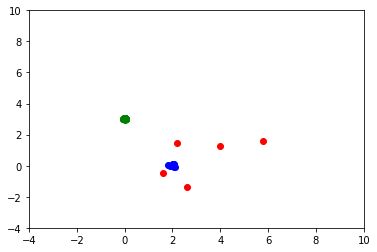

In [3]:
animate_path_positions(BD.swarm_list, anim_frames = 100, anim_interval = 100, colors = ['b', 'g', 'r'])

In [13]:
from TKM import TKM

In [14]:
# np.save('outlier_data', data)
# np.save('outlier_labels', true_labels)
# np.save('outlier_assingments', assignments)
# np.save('outlier_log_assignments', log_assignments)


In [15]:
data = np.transpose(np.hstack((np.hstack((np.array(BD.swarm_list[0]), 
                                          np.array(BD.swarm_list[1]))), 
                               np.array(BD.swarm_list[2]))), axes = [0,2,1])

t,m,n = data.shape

true_labels = []

for i in range(len(BD.swarm_list)):
    num_members = np.array(BD.swarm_list[i]).shape[1]
    true_labels += [i]*num_members
    


In [16]:
tkm = TKM(data)
tkm.perform_clustering(k=3, lam=0.60, max_iter = 5000)
# tkm.perform_clustering_log_c(k=2, lam = .60, max_iter = 5000)
# tkm.perform_clustering_center_derivative(k=2, lam = 0.80, gamma = 0.50, max_iter = 10000)
# tkm.perform_clustering_constant_weights(k=3, lam = .80)
# plt.figure()


In [17]:
temp_assignments = np.argmax(tkm.weights, axis = 2)

2023-03-13 11:41:16,745 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


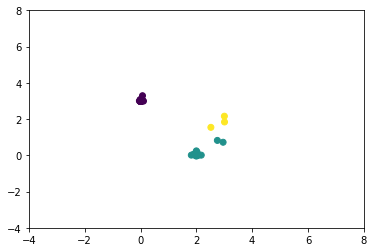

In [18]:
from animate_path import animate_path
#np.tile(true_labels, t).reshape((t,n)).T

animate_path(data, temp_assignments.T, anim_frames = t, anim_interval = 200)

2023-03-13 11:41:51,957 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


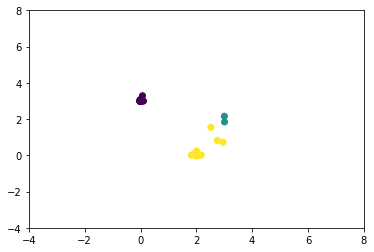

In [19]:
tkm.perform_clustering_avg_centers(k=3, lam = .60, max_iter = 5000)
temp_assignments = np.argmax(tkm.weights, axis = 2)
animate_path(data, temp_assignments.T, anim_frames = t, anim_interval = 200)


In [10]:
def generate_scatter(axis, data_slices, true_label_array, colors = ['r', 'g', 'b'], markers = ['+', '^', "o"]):

    axis.scatter(data_slices[0][true_label_array == 0], data_slices[1][true_label_array == 0], c = colors[0], 
                marker = markers[0], s = 60)
    axis.scatter(data_slices[0][true_label_array == 1], data_slices[1][true_label_array == 1], c = colors[1],
                marker = markers[1], s = 60)
    axis.scatter(data_slices[0][true_label_array == 2], data_slices[1][true_label_array == 2], c = colors[2],
                marker = markers[2], s = 60)
    
    return axis

<Figure size 432x288 with 0 Axes>

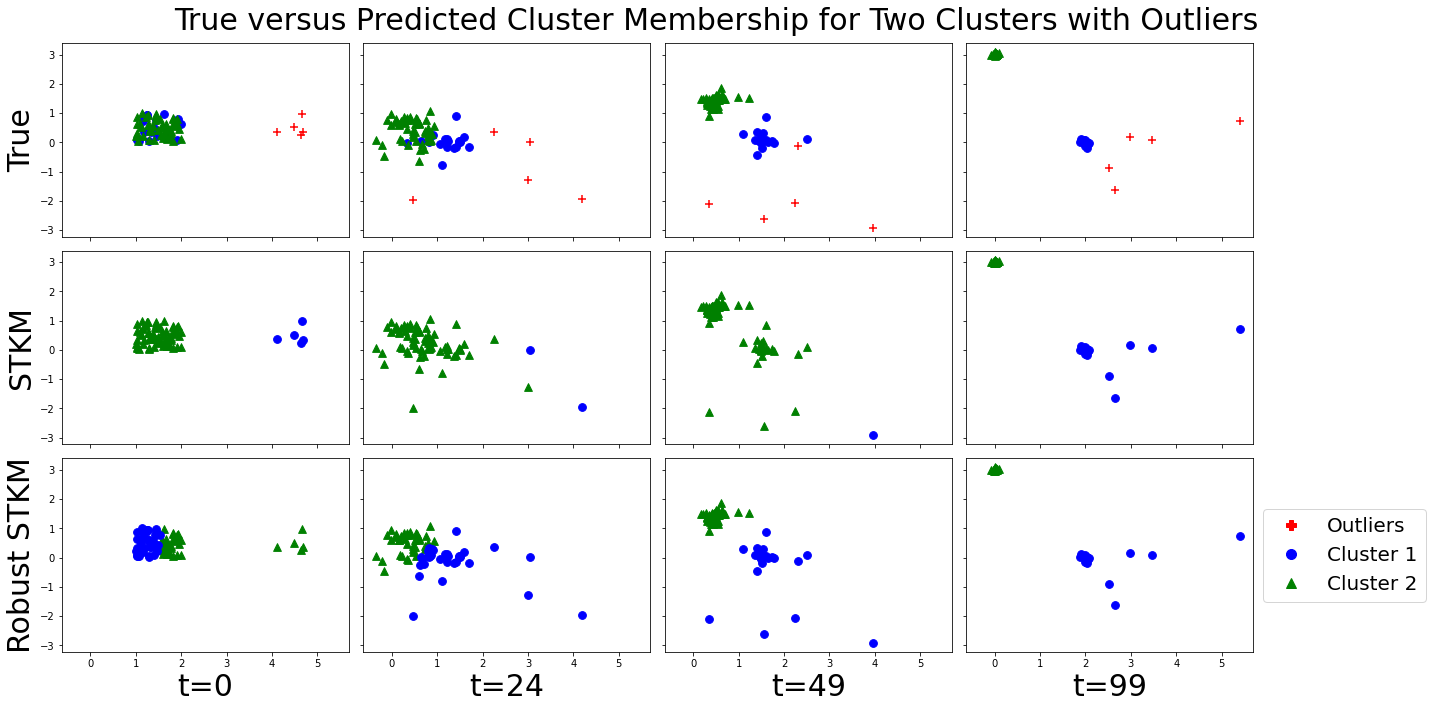

In [11]:
data = np.load('outlier_data.npy')
assignments = np.load('outlier_assingments.npy')
log_assignments = np.load('outlier_log_assignments.npy')
true_labels = np.load('outlier_labels.npy')


rows = [format(row) for row in ['True', 'STKM', 'Robust STKM']]
cols = ['t={}'.format(col) for col in [0,24,49,99]]

colors = ['g', 'b', 'r']
colors_1 = ['b', 'g', 'r']


plt.figure()
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, figsize = [20,10], sharex=True, sharey=True)

generate_scatter(ax1, [data[0,0,:], data[0,1,:]], true_labels, colors = ['b', 'g', 'r'], markers = ['o', '^', '+'])
generate_scatter(ax5, [data[0,0,:], data[0,1,:]], assignments[0,:], colors = ['g', 'b', 'r'], markers = ['^', 'o', '+'])
generate_scatter(ax9, [data[0,0,:], data[0,1,:]], log_assignments[0,:], colors = ['g', 'b', 'r'], markers = ['^', 'o', '+'])

generate_scatter(ax2, [data[24,0,:], data[24,1,:]], true_labels, colors = ['b', 'g', 'r'], markers = ['o', '^', '+'])
generate_scatter(ax6, [data[24,0,:], data[24,1,:]], assignments[24,:], colors = ['g', 'b', 'r'], markers = ['^', 'o', '+'])
generate_scatter(ax10, [data[24,0,:], data[24,1,:]], log_assignments[24,:], colors = ['g', 'b', 'r'], markers = ['^', 'o', '+'])

generate_scatter(ax3, [data[49,0,:], data[49,1,:]], true_labels, colors = ['b', 'g', 'r'], markers = ['o', '^', '+'])
generate_scatter(ax7, [data[49,0,:], data[49,1,:]], assignments[49,:], colors = ['g', 'b', 'r'], markers = ['^', 'o', '+'])
generate_scatter(ax11, [data[49,0,:], data[49,1,:]], log_assignments[49,:], colors = ['g', 'b', 'r'], markers = ['^', 'o', '+'])

generate_scatter(ax4, [data[99,0,:], data[99,1,:]], true_labels, colors = ['b', 'g', 'r'], markers = ['o', '^', '+'])
generate_scatter(ax8, [data[99,0,:], data[99,1,:]], assignments[99,:], colors = ['g', 'b', 'r'], markers = ['^', 'o', '+'])
generate_scatter(ax12, [data[99,0,:], data[99,1,:]], log_assignments[99,:], colors = ['g', 'b', 'r'], markers = ['^', 'o', '+'])


for ax, row in zip((ax1, ax5, ax9), rows):
    ax.set_ylabel(row, rotation=90, fontsize=30)
    
for ax, col in zip((ax9, ax10, ax11, ax12), cols):
    ax.set_xlabel(col, fontsize = 30)


red_patch = mlines.Line2D([], [], color='red', marker='P', linestyle='None',
                          markersize=10, label='Outliers')
blue_patch = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='Cluster 1')
green_patch = mlines.Line2D([], [], color='green', marker='^', linestyle='None',
                          markersize=10, label='Cluster 2')
ax.legend(handles=[red_patch, blue_patch, green_patch], loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20)



plt.suptitle('True versus Predicted Cluster Membership for Two Clusters with Outliers', fontsize = 30)
plt.tight_layout()
plt.savefig('standard_vs_robust_tkm.pdf', format='pdf')



In [12]:
from TKM_long_term_clusters import find_final_labels
from sklearn.metrics.cluster import adjusted_mutual_info_score
final_labels = find_final_labels(tkm.weights, all_labels = [], counts = [])
print(final_labels)

final_ami = adjusted_mutual_info_score(true_labels, final_labels)
print(final_ami)
        

TypeError: find_final_labels() missing 1 required positional argument: 'k'

In [13]:
# criteria_mat = similarity_matrix(weights[:, indices, :])
# ltc = find_k_clusters(k = 3, criteria_mat=criteria_mat)

from TKM_long_term_clusters import find_optimal_threshold

ami, tot_ami = find_optimal_threshold(np.argmax(tkm.weights, axis = 2).T, k=3, true_labels=true_labels)
print(ami, tot_ami)

ImportError: cannot import name 'find_optimal_threshold' from 'TKM_long_term_clusters' (/Users/olgadorabiala/Documents/Thesis/tkm/TKM_long_term_clusters.py)

In [14]:
def plot_cluster_path(axis, swarm_list, true_cluster, pred_cluster, pred_centers):
    
    avg_x = []
    avg_y = []

    for i in range(50):
        avg_loc = np.average(swarm_list[true_cluster][:50][i], axis = 0)
        avg_x.append(avg_loc[0])
        avg_y.append(avg_loc[1])
    
    axis.plot(avg_x, avg_y)
    axis.plot(pred_centers[:, 0, pred_cluster], pred_centers[:, 1, pred_cluster], 'r--')
    axis.scatter(avg_x[0], avg_y[0], c = 'g')
    axis.scatter(avg_x[-1], avg_y[-1], c = 'r')
    axis.scatter(pred_centers[0,0, pred_cluster], pred_centers[0,1, pred_cluster], c='g')
    axis.scatter(pred_centers[-1,0, pred_cluster], pred_centers[-1,1, pred_cluster], c='r')
    return axis



NameError: name 'swarm_list' is not defined

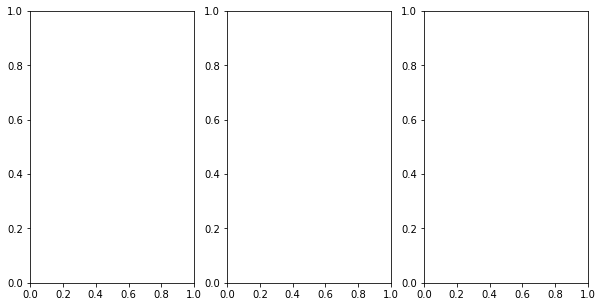

In [15]:
# swarm_list = BD.swarm_list
# centers = tkm.centers

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [10,5])
plot_cluster_path(ax1, swarm_list = swarm_list, true_cluster = 2, pred_cluster= 0, pred_centers = centers)
plot_cluster_path(ax2, swarm_list = swarm_list, true_cluster = 0, pred_cluster= 1, pred_centers = centers)
plot_cluster_path(ax3, swarm_list = swarm_list, true_cluster = 1, pred_cluster= 2, pred_centers = centers)


end = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, label='End')
start = mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                          markersize=10, label='Start')
true_path = mlines.Line2D([], [], color='tab:blue', marker=None, linestyle='-',
                          markersize=10, label='True')
predicted_path = mlines.Line2D([], [], color='red', marker=None, linestyle='--',
                          markersize=10, label='Predicted')
plt.legend(handles=[true_path, predicted_path, start, end], loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 16)



# plt.legend(fontsize = 14)
plt.suptitle('True versus Predicted Cluster Paths', fontsize = 16)
plt.tight_layout()
plt.savefig('truevpredicted.eps', format='eps')

In [16]:
assignments = np.argmax(tkm.weights, axis = 2).T


In [17]:
assignments2 = np.where(assignments == 0, 4, assignments)
assignments2 = np.where(assignments2 == 2, 5, assignments2)
assignments2 = np.where(assignments2==4, 2, assignments2)
assignments2 = np.where(assignments2==1, 0, assignments2)
assignments2 = np.where(assignments2==5, 1, assignments2)



<Figure size 432x288 with 0 Axes>

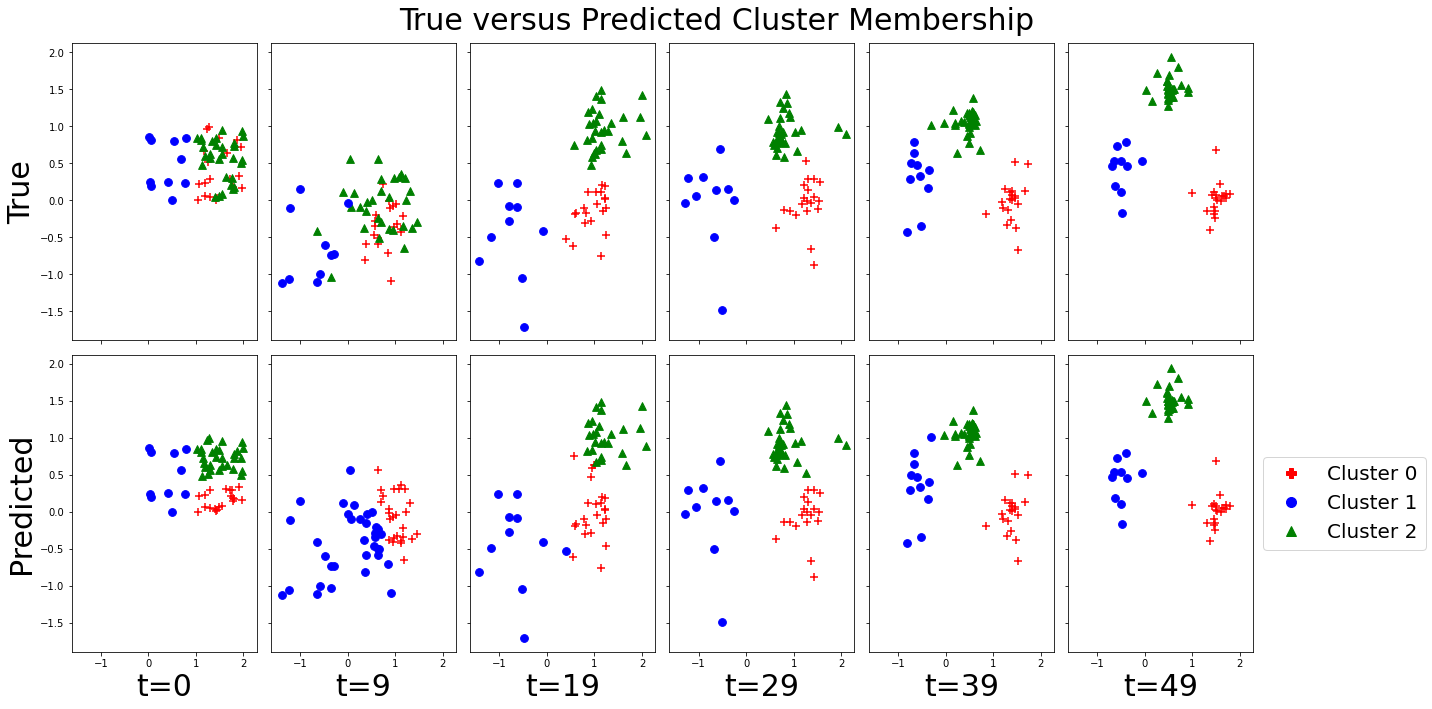

In [18]:
assignments2 = np.load('pred_assingments.npy')
true_labels = np.load('true_labels.npy')
data = np.load('fig_data.npy')
centers = np.load('tkm_centers.npy')
swarm_list = np.load('swarm_list.npy', allow_pickle=True)

plt.figure()
rows = [format(row) for row in ['True', 'Predicted']]
cols = ['t={}'.format(col) for col in [0,9,19,29,39,49]]
true_label_array = np.array(true_labels)

fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(2, 6, figsize = [20,10],  sharex=True, sharey=True)

generate_scatter(ax1, [data[0,0,:], data[0,1,:]], true_label_array)
generate_scatter(ax7, [data[0,0,:], data[0,1,:]], assignments2[:,0])

generate_scatter(ax2, [data[9,0,:], data[9,1,:]], true_label_array)
generate_scatter(ax8, [data[9,0,:], data[9,1,:]], assignments2[:,9])

generate_scatter(ax3, [data[19,0,:], data[19,1,:]], true_label_array)
generate_scatter(ax9, [data[19,0,:], data[19,1,:]], assignments2[:,19])

generate_scatter(ax4, [data[29,0,:], data[29,1,:]], true_label_array)
generate_scatter(ax10, [data[29,0,:], data[29,1,:]], assignments2[:,29])

generate_scatter(ax5, [data[39,0,:], data[39,1,:]], true_label_array)
generate_scatter(ax11, [data[39,0,:], data[39,1,:]], assignments2[:,39])

generate_scatter(ax6, [data[49,0,:], data[49,1,:]], true_label_array)
generate_scatter(ax12, [data[49,0,:], data[49,1,:]], assignments2[:,49])


for ax, row in zip((ax1, ax7), rows):
    ax.set_ylabel(row, rotation=90, fontsize=30)
    
for ax, col in zip((ax7, ax8, ax9, ax10, ax11, ax12), cols):
    ax.set_xlabel(col, fontsize = 30)


red_patch = mlines.Line2D([], [], color='red', marker='P', linestyle='None',
                          markersize=10, label='Cluster 0')
blue_patch = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='Cluster 1')
green_patch = mlines.Line2D([], [], color='green', marker='^', linestyle='None',
                          markersize=10, label='Cluster 2')
ax.legend(handles=[red_patch, blue_patch, green_patch], loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20)



plt.suptitle('True versus Predicted Cluster Membership', fontsize = 30)
plt.tight_layout()
plt.savefig('predictedclustering.pdf', format='pdf')


In [19]:
data.shape, assignments2.shape, true_labels.shape

((100, 2, 60), (60, 50), (60,))

In [20]:
pred_ltc = np.zeros(60)
for i, cluster in enumerate(ltc):
    pred_ltc[cluster] = i

NameError: name 'ltc' is not defined

2023-01-31 13:21:01,597 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


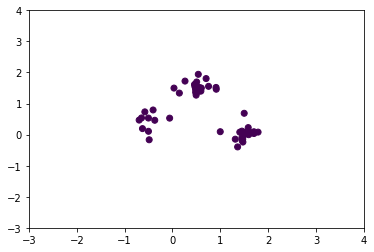

In [21]:
animate_path(data, np.tile(pred_ltc, (60, 1)).T, anim_frames = 50, anim_interval = 200)

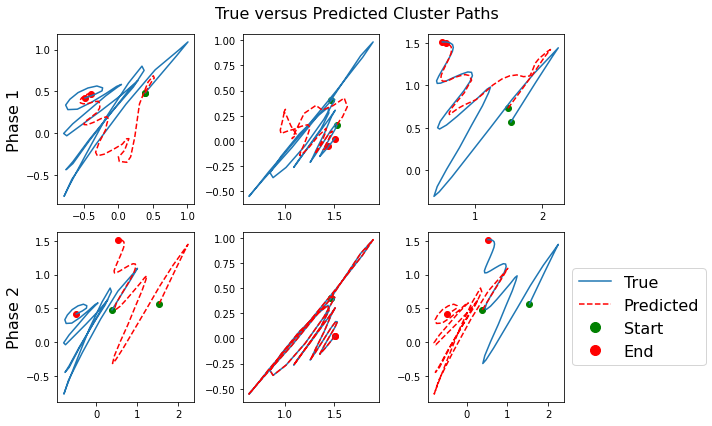

In [37]:
from TKM_long_term_clusters import *
tkm = TKM(data)
tkm.perform_clustering(k=3, lam=0.60, max_iter = 5000)

criteria_mat = similarity_matrix(tkm.weights, similarity_function= similarity_measure)

# ltc = find_k_clusters(k=3, criteria_mat=criteria_mat, threshold_change=.05)
pred_labels = find_final_label_sc(tkm.weights, k=3)

pred_centers = []
for i in np.unique(pred_labels):
    pred_members = np.where(pred_labels == i)[0]
    pred_centers.append(np.average(data[:50,:, pred_members], axis = 2))

lt_centers = np.transpose(np.array(pred_centers), axes = (1,2,0))

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = [10,6])
plot_cluster_path(ax5, swarm_list = swarm_list, true_cluster = 0, pred_cluster= 0, pred_centers = lt_centers)
plot_cluster_path(ax6, swarm_list = swarm_list, true_cluster = 1, pred_cluster= 1, pred_centers = lt_centers)
plot_cluster_path(ax4, swarm_list = swarm_list, true_cluster = 2, pred_cluster= 2, pred_centers = lt_centers)


end = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, label='End')
start = mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                          markersize=10, label='Start')
true_path = mlines.Line2D([], [], color='tab:blue', marker=None, linestyle='-',
                          markersize=10, label='True')
predicted_path = mlines.Line2D([], [], color='red', marker=None, linestyle='--',
                          markersize=10, label='Predicted')
plt.legend(handles=[true_path, predicted_path, start, end], loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 16)


plot_cluster_path(ax1, swarm_list = swarm_list, true_cluster = 2, pred_cluster= 0, pred_centers = centers)
plot_cluster_path(ax2, swarm_list = swarm_list, true_cluster = 0, pred_cluster= 1, pred_centers = centers)
plot_cluster_path(ax3, swarm_list = swarm_list, true_cluster = 1, pred_cluster= 2, pred_centers = centers)

rows = [format(row) for row in ['Phase 1', 'Phase 2']]
for ax, row in zip((ax1, ax4), rows):
    ax.set_ylabel(row, rotation=90, fontsize=16)

# plt.legend(fontsize = 14)
plt.suptitle('True versus Predicted Cluster Paths', fontsize = 16)
plt.tight_layout()
# plt.savefig('truevpredicted.pdf', format='pdf')



In [56]:
assignments = np.argmax(tkm.weights, axis = 2).T

assignments.shape, data.shape

((60, 100), (100, 2, 60))

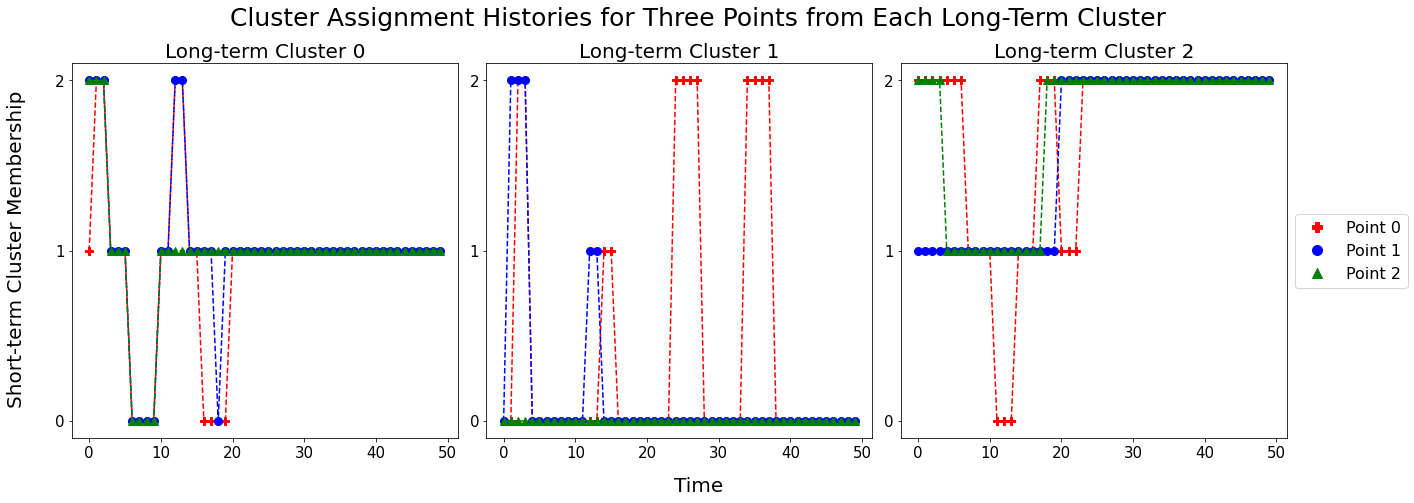

In [60]:
assignments = np.argmax(tkm.weights, axis = 2).T

fig, axs = plt.subplots(1, 3, figsize = (20,7))
colors = ['r', 'b', 'g']
markers = ['P', 'o', '^']
for i in range(3):
    members = np.where(pred_labels == i)[0]
    for j in range(3):
        
        axs[i].plot(assignments[members[j], :50],  marker = markers[j], linestyle = '--', c = colors[j], markersize=8)
    axs[i].set_yticks(ticks = [0,1,2])
    axs[i].tick_params(axis='y', labelsize=15)
    axs[i].tick_params(axis='x', labelsize=15)
axs[0].set_title('Long-term Cluster 0',  fontsize=20)
axs[1].set_title('Long-term Cluster 1', fontsize=20)
axs[2].set_title('Long-term Cluster 2', fontsize=20)
fig.suptitle('Cluster Assignment Histories for Three Points from Each Long-Term Cluster', fontsize = 25)
fig.supxlabel('Time', fontsize = 20)
fig.supylabel('Short-term Cluster Membership', fontsize = 20)

point_0 = mlines.Line2D([], [], color='red', marker='P', linestyle='None',
                          markersize=10, label='Point 0')
point_1 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='Point 1')
point_2 = mlines.Line2D([], [], color='g', marker='^', linestyle='None',
                          markersize=10, label='Point 2')
plt.legend(handles=[point_0, point_1, point_2], loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 16)

plt.tight_layout(rect=(0.025,0,1,1))
plt.savefig('storyline.pdf', format='pdf')




In [266]:
# np.save('pred_assingments', assignments2)
# np.save('true_labels', true_labels)
# np.save('fig_data', data)
# np.save('swarm_list', BD.swarm_list, allow_pickle = True)
# np.save('tkm_centers', tkm.centers)

# assignments2 = np.load('pred_assingments.npy')
# true_labels = np.load('true_labels.npy')
# data = np.load('fig_data.npy')
# # swarm_list = np.load('swarm_list.npy')
# centers = np.load('tkm_centers.npy')

# for i in range(true_labels):
#     members = np.where(true_labels == i)[0]
    

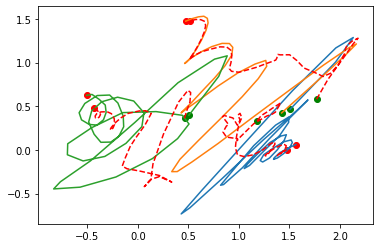

In [38]:
for i in range(3):
    swarm = BD.swarm_list[i][:50]
    swarm_mean = np.average(swarm, axis = 1)
    plt.scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g')
    plt.scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r')
    plt.plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true paths')
    
plt.plot(tkm.centers[:, 0, 0], tkm.centers[:,1,0], 'r--', label = 'predicted paths')
plt.scatter(tkm.centers[0,0,0], tkm.centers[0,1,0], c = 'g', label = 'path start')
plt.scatter(tkm.centers[-1,0,0], tkm.centers[-1,1,0], c = 'r', label = 'path end')

plt.plot(tkm.centers[:, 0, 1], tkm.centers[:,1,1], 'r--')
plt.scatter(tkm.centers[0,0,1], tkm.centers[0,1,1], c = 'g')
plt.scatter(tkm.centers[-1,0,1], tkm.centers[-1,1,1], c = 'r')

plt.plot(tkm.centers[:, 0, 2], tkm.centers[:,1,2], 'r--')
plt.scatter(tkm.centers[0,0,2], tkm.centers[0,1,2], c = 'g')
plt.scatter(tkm.centers[-1,0,2], tkm.centers[-1,1,2], c = 'r')

# plt.legend()

ValueError: 'c' argument has 75 elements, which is inconsistent with 'x' and 'y' with size 60.

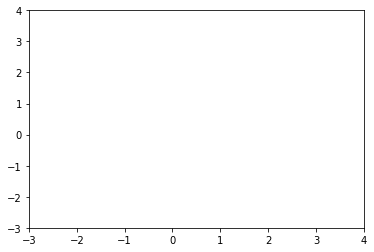

In [61]:
assignments = np.argmax(tkm.weights, axis = 2).T

from animate_path import animate_path 

animate_path(data[:50,:,:], assignments, anim_frames = 35, anim_interval = 100)



2022-02-08 14:48:07,234 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


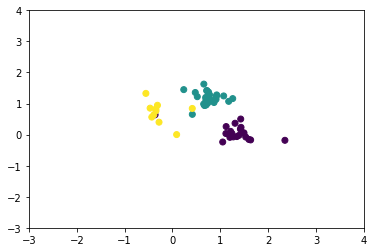

In [22]:
animate_path(data[:50,:,:], np.tile(true_labels, (50,1)).T, anim_frames = 35, anim_interval = 100)



In [11]:
football = pd.read_csv('tracking2018.csv')

In [12]:
football['time'].unique()

array(['2018-12-30T21:25:32.200', '2018-12-30T21:25:32.300',
       '2018-12-30T21:25:32.400', ..., '2018-09-11T05:25:18.000',
       '2018-09-11T05:25:18.100', '2018-09-11T05:25:18.200'], dtype=object)

In [13]:
football['date'] = pd.to_datetime(football['time']).dt.date
football['time'] = pd.to_datetime(football['time']).dt.time

In [14]:
football.head()

time      x      y     s     a   dis       o     dir event  \
0  21:25:32.200000  41.32  29.45  4.36  1.33  0.43  130.42  128.44  None   
1  21:25:32.300000  41.68  29.17  4.59  1.24  0.45  128.59  127.81  None   
2  21:25:32.400000  42.05  28.88  4.74  0.99  0.47  124.47  128.15  None   
3  21:25:32.500000  42.43  28.59  4.87  0.71  0.48  126.02  127.35  None   
4  21:25:32.600000  42.84  28.31  4.96  0.79  0.50  131.71  124.75  None   

     nflId    displayName  jerseyNumber position  team  frameId      gameId  \
0  39470.0  Justin Tucker           9.0        K  home        1  2018123000   
1  39470.0  Justin Tucker           9.0        K  home        2  2018123000   
2  39470.0  Justin Tucker           9.0        K  home        3  2018123000   
3  39470.0  Justin Tucker           9.0        K  home        4  2018123000   
4  39470.0  Justin Tucker           9.0        K  home        5  2018123000   

   playId playDirection        date  
0      36         right  2018-12-30  
1      36         right  2018-12-30  
2      36         right  2018-12-30  
3      36         right  2018-12-30  
4      36         right  2018-12-30

In [15]:
games = football['gameId'].unique()
single_game = football[football['gameId'] == games[0]]
single_game.head()

time      x      y     s     a   dis       o     dir event  \
0  21:25:32.200000  41.32  29.45  4.36  1.33  0.43  130.42  128.44  None   
1  21:25:32.300000  41.68  29.17  4.59  1.24  0.45  128.59  127.81  None   
2  21:25:32.400000  42.05  28.88  4.74  0.99  0.47  124.47  128.15  None   
3  21:25:32.500000  42.43  28.59  4.87  0.71  0.48  126.02  127.35  None   
4  21:25:32.600000  42.84  28.31  4.96  0.79  0.50  131.71  124.75  None   

     nflId    displayName  jerseyNumber position  team  frameId      gameId  \
0  39470.0  Justin Tucker           9.0        K  home        1  2018123000   
1  39470.0  Justin Tucker           9.0        K  home        2  2018123000   
2  39470.0  Justin Tucker           9.0        K  home        3  2018123000   
3  39470.0  Justin Tucker           9.0        K  home        4  2018123000   
4  39470.0  Justin Tucker           9.0        K  home        5  2018123000   

   playId playDirection        date  
0      36         right  2018-12-30  
1      36         right  2018-12-30  
2      36         right  2018-12-30  
3      36         right  2018-12-30  
4      36         right  2018-12-30

In [16]:
single_game['playId'].unique()

array([  36,  373,  392,  548,  564,  787,  803,  892, 1069, 1085, 1267,
       1538, 1557, 1976, 2165, 2314, 2351, 2502, 2554, 2570, 2860, 2883,
       2975, 3106, 3378, 3397, 3732, 3751, 4006, 4029, 4148])

In [37]:
import datetime
single_play = single_game[single_game['playId']==36]
single_play.head()

time      x      y     s     a   dis       o     dir event  \
0  21:25:32.200000  41.32  29.45  4.36  1.33  0.43  130.42  128.44  None   
1  21:25:32.300000  41.68  29.17  4.59  1.24  0.45  128.59  127.81  None   
2  21:25:32.400000  42.05  28.88  4.74  0.99  0.47  124.47  128.15  None   
3  21:25:32.500000  42.43  28.59  4.87  0.71  0.48  126.02  127.35  None   
4  21:25:32.600000  42.84  28.31  4.96  0.79  0.50  131.71  124.75  None   

     nflId    displayName  jerseyNumber position  team  frameId      gameId  \
0  39470.0  Justin Tucker           9.0        K  home        1  2018123000   
1  39470.0  Justin Tucker           9.0        K  home        2  2018123000   
2  39470.0  Justin Tucker           9.0        K  home        3  2018123000   
3  39470.0  Justin Tucker           9.0        K  home        4  2018123000   
4  39470.0  Justin Tucker           9.0        K  home        5  2018123000   

   playId playDirection        date  
0      36         right  2018-12-30  
1      36         right  2018-12-30  
2      36         right  2018-12-30  
3      36         right  2018-12-30  
4      36         right  2018-12-30

In [38]:
single_play.dropna(inplace=True)
single_play = single_play.sort_values(by=['time', 'nflId'])
single_play.head()

# for time in single_play['time'].unique():
#     single_play[single_play['time'] == time]

/opt/anaconda3/envs/tkm/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


time      x      y     s     a   dis       o     dir event  \
0    21:25:32.200000  41.32  29.45  4.36  1.33  0.43  130.42  128.44  None   
105  21:25:32.200000  62.04  14.23  0.07  0.52  0.00  272.98  325.00  None   
210  21:25:32.200000  61.62   5.06  0.08  0.14  0.01  334.89  246.70  None   
315  21:25:32.200000  44.22  37.38  0.11  0.11  0.02  156.01  106.88  None   
420  21:25:32.200000  43.83  42.43  0.15  0.17  0.02  104.41   84.56  None   

       nflId        displayName  jerseyNumber position  team  frameId  \
0    39470.0      Justin Tucker           9.0        K  home        1   
105  40579.0  Ray-Ray Armstrong          52.0      OLB  away        1   
210  41316.0     Phillip Gaines          33.0       CB  away        1   
315  42398.0      Maxx Williams          87.0       TE  home        1   
420  42437.0      Ty Montgomery          88.0       RB  home        1   

         gameId  playId playDirection        date  
0    2018123000      36         right  2018-12-30  
105  2018123000      36         right  2018-12-30  
210  2018123000      36         right  2018-12-30  
315  2018123000      36         right  2018-12-30  
420  2018123000      36         right  2018-12-30

In [39]:
home = single_play[single_play['team'] == 'home']
away = single_play[single_play['team'] == 'away']

home_players = home['nflId'].nunique()
away_players = home['nflId'].nunique()

home_list = []
times = home['time'].unique()
for time in times:
    #positions in order by player
    home_list.append(home[home['time'] == time][['x', 'y']].to_numpy())

away_list = []
for time in away['time'].unique():
    #positions in order by player
    away_list.append(away[away['time'] == time][['x', 'y']].to_numpy())    

positions = [home_list, away_list]


2022-01-20 17:36:32,669 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


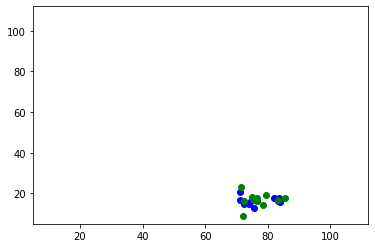

In [40]:
animate_path(positions, anim_frames = len(times), anim_interval = 100, colors = ['b', 'g', 'r'])

In [41]:
data = np.transpose(np.hstack((np.array(positions[0]), 
                                          np.array(positions[1]))), axes = [0,2,1])

t,m,n = data.shape

Iteration 100


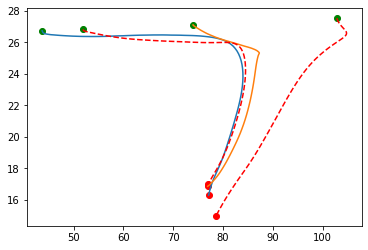

In [50]:
tkm = TKM(data)
# tkm.perform_clustering_center_derivative(k=2, lam = .80, gamma = 0, max_iter = 50000)
tkm.perform_clustering_constant_weights(k=2, lam = .80, max_iter = 5000)

plt.figure()
for i in range(2):
    swarm = np.array(positions[i])
    swarm_mean = np.average(swarm, axis = 1)
    plt.scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g')
    plt.scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r')
    plt.plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true')
    
plt.plot(tkm.centers[:, 0, 0], tkm.centers[:,1,0], 'r--', label = 'predicted')
plt.scatter(tkm.centers[0,0,0], tkm.centers[0,1,0], c = 'g')
plt.scatter(tkm.centers[-1,0,0], tkm.centers[-1,1,0], c = 'r')

plt.plot(tkm.centers[:, 0, 1], tkm.centers[:,1,1], 'r--', label = 'predicted')
plt.scatter(tkm.centers[0,0,1], tkm.centers[0,1,1], c = 'g')
plt.scatter(tkm.centers[-1,0,1], tkm.centers[-1,1,1], c = 'r')



(22,)


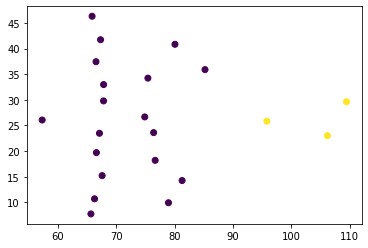

In [55]:
iteration = 40
assignment = np.where(tkm.weights == 0)[1]
print(assignment.shape)
plt.scatter(data[iteration,0,:], data[iteration,1,:], c = assignment)
plt.savefig('assignment_t10')

In [173]:
from SpectralFunctions import *

U = data[0,:,:]
m,n = U.shape

print(U.shape)

(2, 22)


In [194]:
A = AffinityMatrix(U, n, 5)
L = LaplacianMatrix(A)
X, eigvals = EigVecMatrix(L, 2)
normalX = Normalize(X)



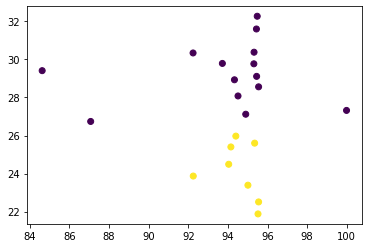

In [200]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=0).fit(normalX)

newX = normalX.T

plt.figure()
plt.scatter(U[0,:], U[1,:], c =kmeans.labels_)